In [2]:
import pandas as pd

df = pd.read_csv("../dataset/dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


      timestamp class  confidence    x    y    w    h        action  height  \
0  1.758701e+09     0    0.804037  604  265  122  186    move_right      40   
1  1.758701e+09     0    0.773873  576  273  109  185  move_forward      50   
2  1.758701e+09     0    0.813523  584  245  121  193    move_right      40   
3  1.758701e+09     0    0.761101  585  248  107  186    move_right      40   
4  1.758701e+09     0    0.793792  562  260  108  182  move_forward      40   

   temp  speed_x  speed_y  speed_z  flight_time  battery   flight_id  \
0  81.0        0        0        0          279       66  flight-005   
1  81.5        0        0        0          281       66  flight-005   
2  80.5        0        0        0          284       66  flight-005   
3  80.0        0        0        0          286       66  flight-005   
4  80.0        0        0        0          289       66  flight-005   

                                          video_path      detection_id  
0  /Users/vishwanib

In [3]:
print(df.isnull().sum())


timestamp       0
class           0
confidence      0
x               0
y               0
w               0
h               0
action          0
height          0
temp            0
speed_x         0
speed_y         0
speed_z         0
flight_time     0
battery         0
flight_id       0
video_path      0
detection_id    0
dtype: int64


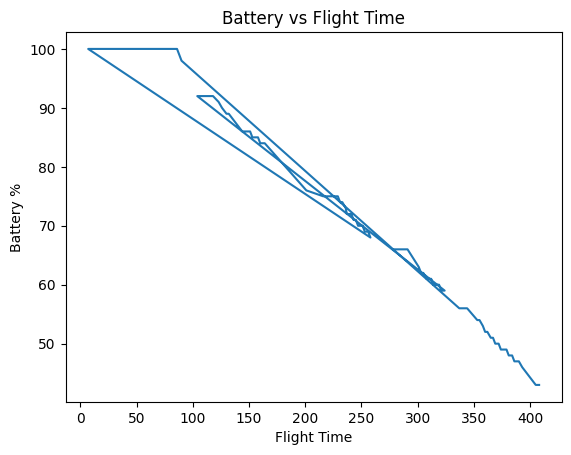

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['flight_time'], df['battery'])
plt.xlabel("Flight Time")
plt.ylabel("Battery %")
plt.title("Battery vs Flight Time")
plt.show()



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df["bbox_area"] = df["w"] * df["h"]
df["aspect_ratio"] = df["w"] / (df["h"] + 1e-5)


In [10]:
df["dx"] = df["x"].diff().fillna(0)
df["dy"] = df["y"].diff().fillna(0)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["action_encoded"] = le.fit_transform(df["action"])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'manual_land': np.int64(0), 'move_forward': np.int64(1), 'move_left': np.int64(2), 'move_right': np.int64(3)}


In [17]:
df.to_csv("../dataset/processed_logs.csv", index=False)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load processed data
df = pd.read_csv("../dataset/processed_logs.csv")

# Create reports/figures folder if not exists
os.makedirs("../reports/figures", exist_ok=True)


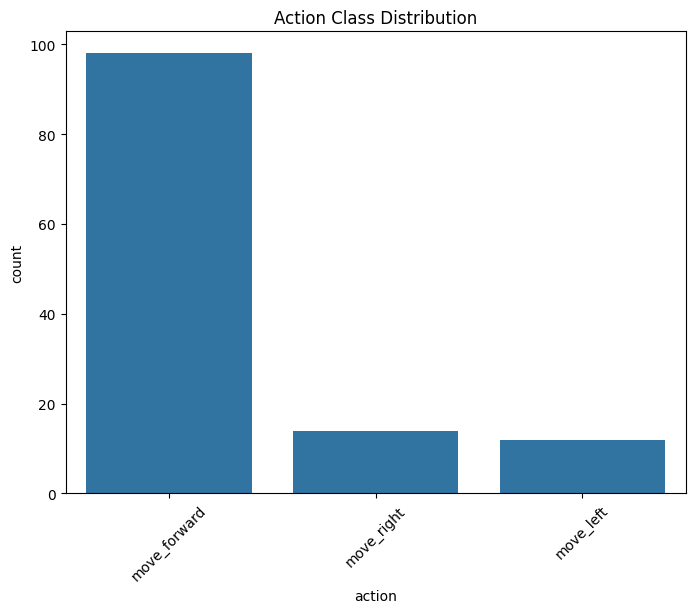

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x="action", data=df)
plt.title("Action Class Distribution")
plt.xticks(rotation=45)
plt.savefig("../reports/figures/action_distribution.png")
plt.show()


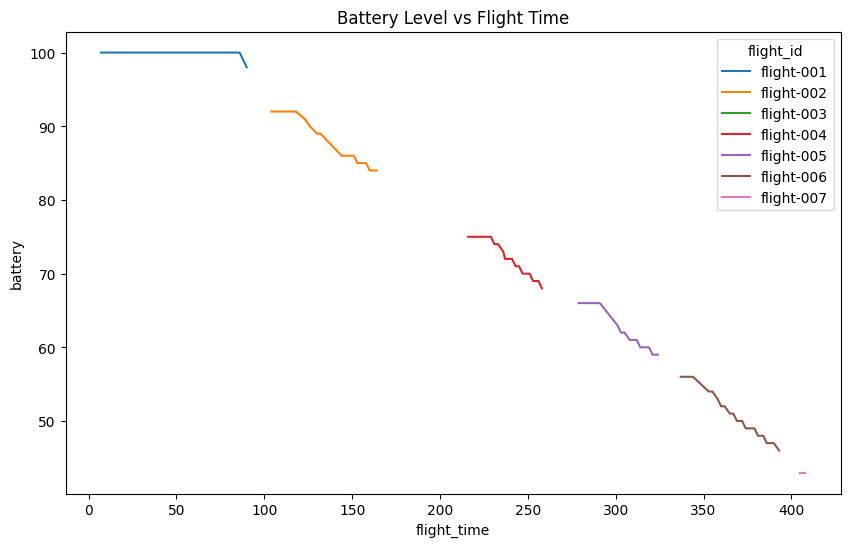

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x="flight_time", y="battery", hue="flight_id", data=df)
plt.title("Battery Level vs Flight Time")
plt.savefig("../reports/figures/battery_vs_flight_time.png")
plt.show()


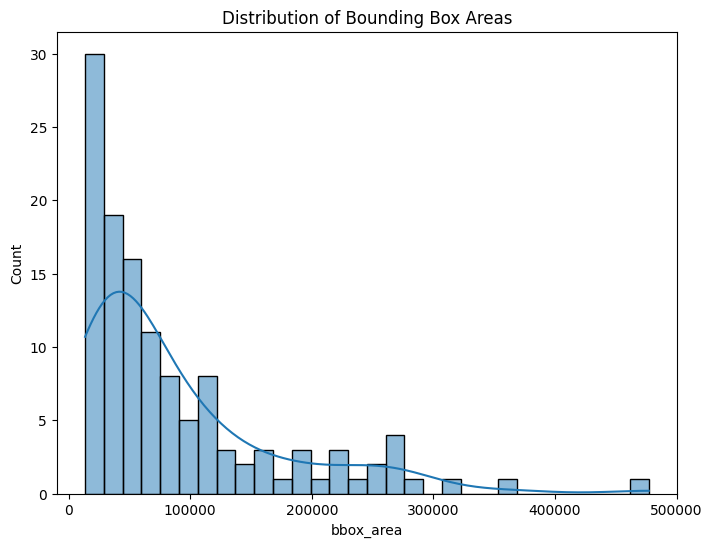

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df["bbox_area"], bins=30, kde=True)
plt.title("Distribution of Bounding Box Areas")
plt.savefig("../reports/figures/bbox_area_distribution.png")
plt.show()


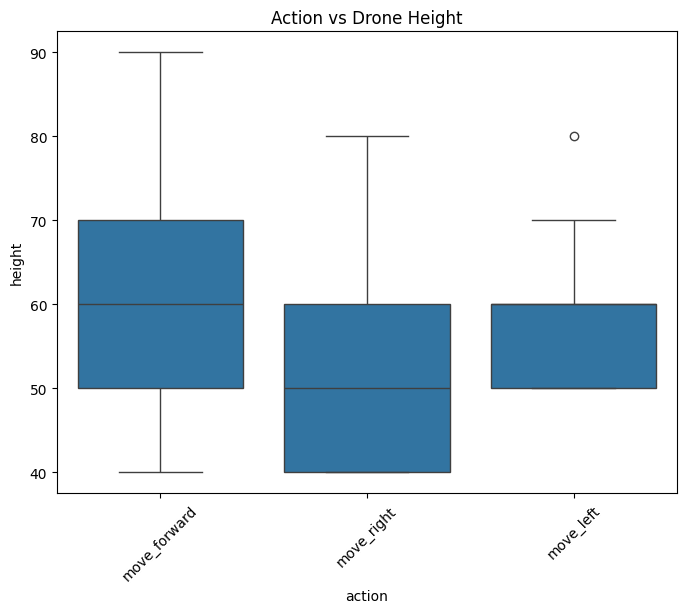

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x="action", y="height", data=df)
plt.xticks(rotation=45)
plt.title("Action vs Drone Height")
plt.savefig("../reports/figures/action_vs_height.png")
plt.show()


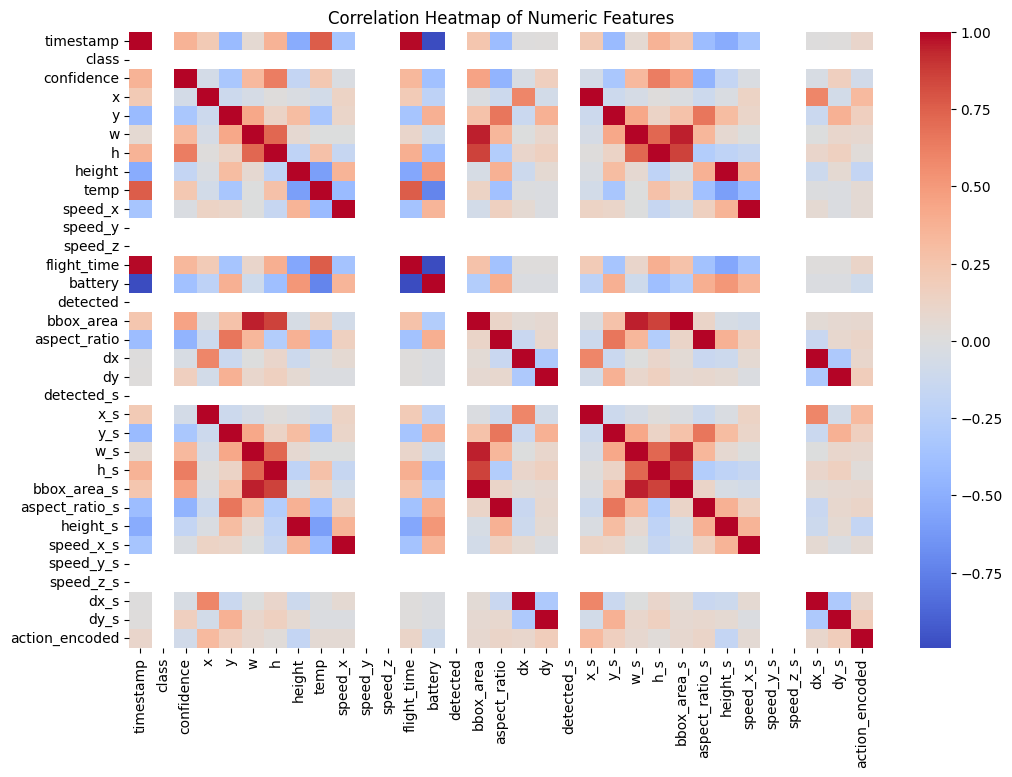

In [26]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("../reports/figures/correlation_heatmap.png")
plt.show()
